<a href="https://colab.research.google.com/github/AryanMethil/Diabetes-KNN-vs-Naive-Bayes/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv('/content/drive/My Drive/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [3]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
df['kfolds']=-1
df=df.sample(frac=1,random_state=42).reset_index(drop=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,kfolds
0,2,94,76,18,66,31.6,0.649,23,0,-1
1,0,117,80,31,53,45.2,0.089,24,0,-1
2,7,178,84,0,0,39.9,0.331,41,1,-1
3,6,165,68,26,168,33.6,0.631,49,0,-1
4,1,111,86,19,0,30.1,0.143,23,0,-1


In [8]:
from sklearn import model_selection
strat_kf=model_selection.StratifiedKFold(n_splits=5)
for fold,(trn_,val_) in enumerate(strat_kf.split(X=df,y=df['Outcome'])):
  df.loc[val_,'kfolds']=fold
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,kfolds
0,2,94,76,18,66,31.6,0.649,23,0,0
1,0,117,80,31,53,45.2,0.089,24,0,0
2,7,178,84,0,0,39.9,0.331,41,1,0
3,6,165,68,26,168,33.6,0.631,49,0,0
4,1,111,86,19,0,30.1,0.143,23,0,0


In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_2=pd.DataFrame(scaler.fit_transform(df),index=df.index,columns=df.columns)
df_2['Outcome']=df['Outcome']
df_2['kfolds']=df['kfolds']
df_2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,kfolds
0,-0.547919,-0.841722,0.356432,-0.159107,-0.119819,-0.049826,0.534935,-0.871374,0,0
1,-1.141852,-0.121888,0.563223,0.656358,-0.232697,1.676276,-1.156332,-0.786286,0,0
2,0.936914,1.787238,0.770014,-1.288212,-0.692891,1.003604,-0.425463,0.660206,1,0
3,0.639947,1.380375,-0.057150,0.342717,0.765836,0.204013,0.480572,1.340908,0,0
4,-0.844885,-0.309671,0.873409,-0.096379,-0.692891,-0.240205,-0.993245,-0.871374,0,0


In [10]:
# df_2=df
# df_2.head()

In [11]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [16]:
def run(fold,df,models):

  df_train=df[df['kfolds']!=fold].reset_index(drop=True)
  df_valid=df[df['kfolds']==fold].reset_index(drop=True)

  x_train=df_train.drop('Outcome',axis=1).values
  y_train=df_train.Outcome.values

  x_valid=df_valid.drop('Outcome',axis=1).values
  y_valid=df_valid.Outcome.values

  accuracy=[]
  confusion_matrices=[]
  for model_name,model_constructor in list(models.items()):
    clf=model_constructor
    clf.fit(x_train,y_train)

    preds_train=clf.predict(x_train)
    preds_valid=clf.predict(x_valid)

    acc_train=metrics.accuracy_score(y_train,preds_train)
    acc_valid=metrics.accuracy_score(y_valid,preds_valid)
    conf_matrix=metrics.confusion_matrix(y_valid,preds_valid)

    accuracy.append(acc_valid)
    confusion_matrices.append(conf_matrix)

    print(f'Model => {model_name} => Fold = {fold} => Training Accuracy = {acc_train} => Validation Accuracy = {acc_valid}')

  print('\n--------------------------------------------------------------------------------------------\n')
  return accuracy,confusion_matrices

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [18]:
models={f'KNN_{i}':KNeighborsClassifier(n_neighbors=i) for i in range(2,31)}

In [19]:
accuracy,confusion_matrices=run(4,df_2,models=models)

Model => KNN_2 => Fold = 4 => Training Accuracy = 0.8357723577235773 => Validation Accuracy = 0.7124183006535948
Model => KNN_3 => Fold = 4 => Training Accuracy = 0.8341463414634146 => Validation Accuracy = 0.7450980392156863
Model => KNN_4 => Fold = 4 => Training Accuracy = 0.7967479674796748 => Validation Accuracy = 0.7124183006535948
Model => KNN_5 => Fold = 4 => Training Accuracy = 0.8130081300813008 => Validation Accuracy = 0.738562091503268
Model => KNN_6 => Fold = 4 => Training Accuracy = 0.775609756097561 => Validation Accuracy = 0.7254901960784313
Model => KNN_7 => Fold = 4 => Training Accuracy = 0.7788617886178861 => Validation Accuracy = 0.7254901960784313
Model => KNN_8 => Fold = 4 => Training Accuracy = 0.7739837398373983 => Validation Accuracy = 0.738562091503268
Model => KNN_9 => Fold = 4 => Training Accuracy = 0.7853658536585366 => Validation Accuracy = 0.7320261437908496
Model => KNN_10 => Fold = 4 => Training Accuracy = 0.7772357723577236 => Validation Accuracy = 0.72

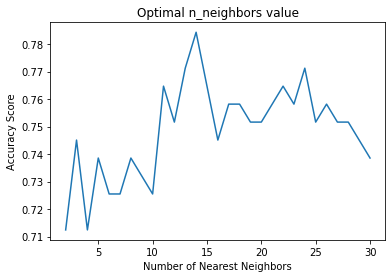

In [20]:
x=[i for i in range(2,31)]
y=accuracy
plt.plot(x,y)
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('Accuracy Score')
plt.title("Optimal n_neighbors value")
plt.show()

In [21]:
models={
        'KNN': KNeighborsClassifier(n_neighbors=14),
        'Naive Bayes': GaussianNB()
        }

In [22]:
accuracies,confusion_matrices=[],[]
for f in range(5):
  accuracy,confusion_matrix=run(f,df_2,models=models)
  accuracies.append(accuracy)
  confusion_matrices.append(confusion_matrix)

Model => KNN => Fold = 0 => Training Accuracy = 0.7801302931596091 => Validation Accuracy = 0.7012987012987013
Model => Naive Bayes => Fold = 0 => Training Accuracy = 0.752442996742671 => Validation Accuracy = 0.7467532467532467

--------------------------------------------------------------------------------------------

Model => KNN => Fold = 1 => Training Accuracy = 0.7687296416938111 => Validation Accuracy = 0.6883116883116883
Model => Naive Bayes => Fold = 1 => Training Accuracy = 0.7801302931596091 => Validation Accuracy = 0.7467532467532467

--------------------------------------------------------------------------------------------

Model => KNN => Fold = 2 => Training Accuracy = 0.7654723127035831 => Validation Accuracy = 0.7467532467532467
Model => Naive Bayes => Fold = 2 => Training Accuracy = 0.7654723127035831 => Validation Accuracy = 0.7597402597402597

--------------------------------------------------------------------------------------------

Model => KNN => Fold = 3 =

In [23]:
x_axis_labels=['Predicted Normal','Predicted Diabetic']
y_axis_labels=['True Normal','True Diabetic']

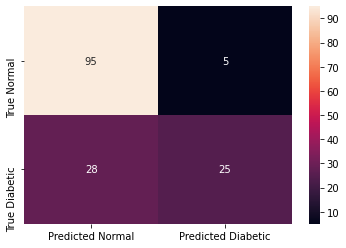

In [24]:
import seaborn as sns
sns.heatmap(confusion_matrices[4][0],xticklabels=x_axis_labels,yticklabels=y_axis_labels,annot=True)


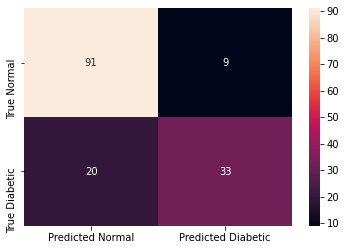

In [25]:
sns.heatmap(confusion_matrices[4][1],xticklabels=x_axis_labels,yticklabels=y_axis_labels,annot=True)
